In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [2]:
pbp = pd.read_csv('pbp_data/play_by_play_2021.csv.gz',compression='gzip',low_memory=False)

In [3]:
third_downs = pbp.loc[(pbp.down==3) & (pbp.qb_dropback==1)].copy()
third_downs['intended_epa'] = third_downs['air_epa'] + third_downs['xyac_epa']

In [4]:
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

passers = third_downs.groupby('passer', as_index=False)\
    .agg({'play_id':'count','intended_epa':'mean','epa':'mean', 'sack':'mean', 'qb_scramble':'mean','posteam':'first'})\
    .query('play_id>20')
passers['delta'] = passers['epa'] - passers['intended_epa']
passers['color'] = passers.posteam.map(COLORS)

# 5 most and least aggressive third down passers
passers.sort_values('intended_epa',ascending=False).iloc[np.r_[0:5, -5:0]]

,passer,play_id,intended_epa,epa,sack,qb_scramble,posteam,delta,color
51,R.Wilson,46,1.860110,-0.560676,0.195652,0.108696,SEA,-2.420786,#7AC142
1,Aa.Rodgers,84,1.848144,0.121382,0.095238,0.035714,GB,-1.726762,#24423C
29,J.Hurts,87,1.763964,-0.044278,0.091954,0.149425,PHI,-1.808242,#014A53
4,B.Mayfield,73,1.754500,-0.235471,0.123288,0.095890,CLE,-1.989971,#FB4F14
60,T.Siemian,30,1.749430,-0.140340,0.000000,0.000000,NO,-1.889770,#A08A58
50,R.Tannehill,110,1.164655,-0.095858,0.100000,0.036364,TEN,-1.260514,#4095D1
52,S.Darnold,96,1.141306,-0.357037,0.114583,0.052083,CAR,-1.498343,#0085CA
17,D.Mills,69,1.101760,-0.418799,0.173913,0.000000,HOU,-1.520558,#C9243F
20,G.Smith,28,1.042703,-0.365571,0.214286,0.000000,SEA,-1.408274,#7AC142
27,J.Goff,93,0.888209,-0.389149,0.129032,0.032258,DET,-1.277359,#046EB4


Text(0.1, 0.8, 'Success ^')

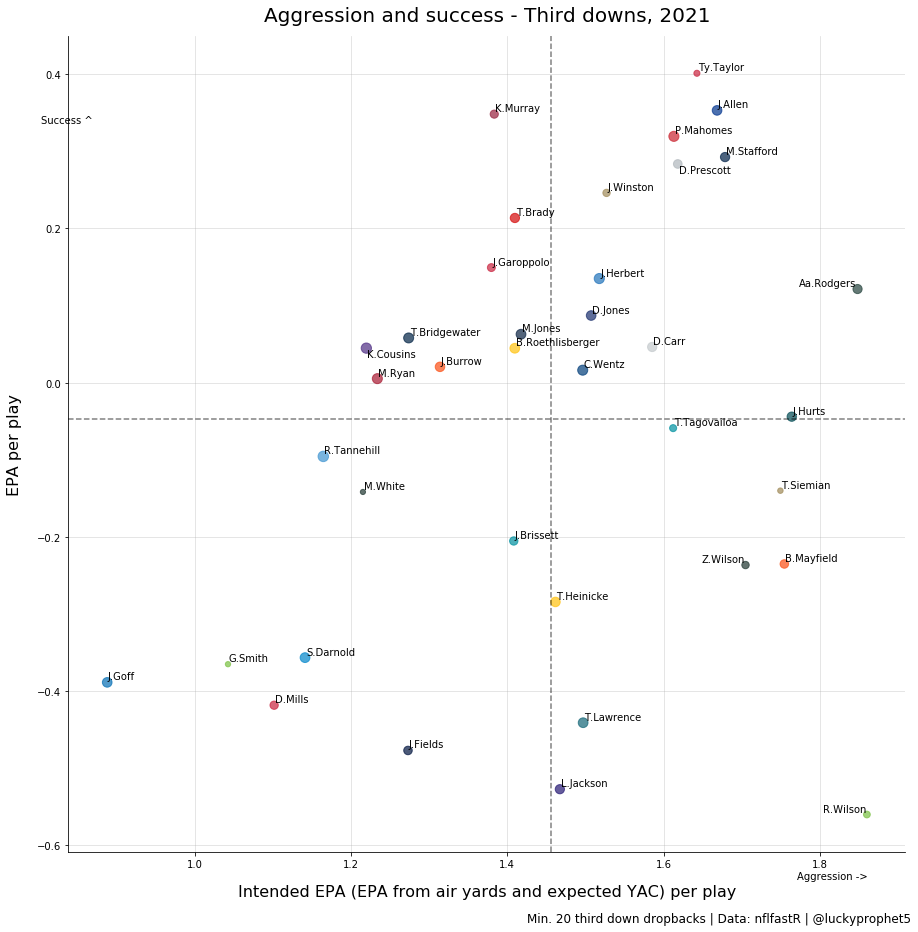

In [5]:
# thanks @DeryckG_ https://gist.github.com/Deryck97/dff8d33e9f841568201a2a0d5519ac5e

fig, ax = plt.subplots(figsize=(15,15))

#Create vertical and horizontal lines for averages of each metric
ax.axvline(x=passers.intended_epa.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=passers.epa.mean(), linestyle='--', alpha=.5, color='black')

#Create scatter plot
#s stands for size, the dot size is proportional to the QBs number of plays
ax.scatter(passers.intended_epa, passers.epa, 
           s=passers.play_id, 
           alpha=.7, 
           color=passers.color)

#Add text to each dot
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    passers.intended_epa, passers.epa, passers.passer)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Remove top and right boundary lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Add title, labels, and source
ax.set_title('Aggression and success - Third downs, 2021',fontsize=20,pad=15)
ax.set_xlabel('Intended EPA (EPA from air yards and expected YAC) per play',fontsize=16,labelpad=15)
ax.set_ylabel('EPA per play',fontsize=16,labelpad=15)
plt.figtext(.55,.06,'Min. 20 third down dropbacks | Data: nflfastR | @luckyprophet5',fontsize=12)
plt.figtext(.8, .1, 'Aggression ->')
plt.figtext(.1, .8, 'Success ^')

In [6]:
rsq = passers.corr()**2

Text(0.06, 0.06, 'R^2: 0.443')

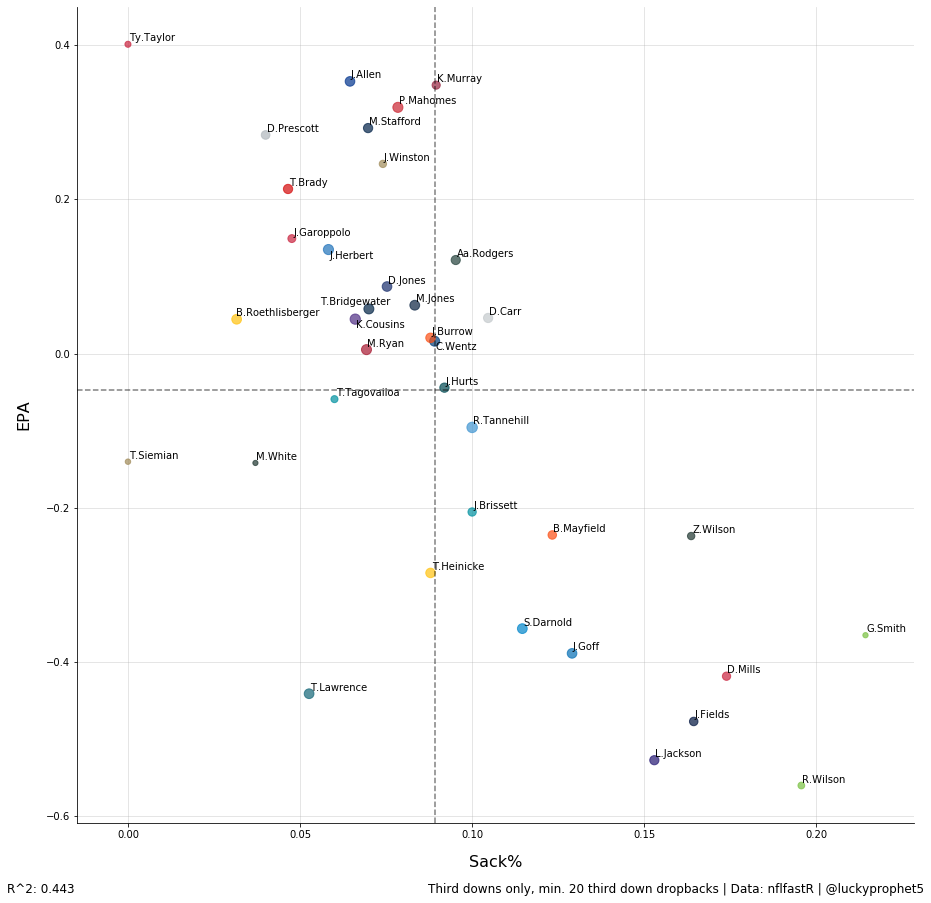

In [7]:
fig, ax = plt.subplots(figsize=(15,15))

#Create vertical and horizontal lines for averages of each metric
ax.axvline(x=passers.sack.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=passers.epa.mean(), linestyle='--', alpha=.5, color='black')

#Create scatter plot
#s stands for size, the dot size is proportional to the QBs number of plays
ax.scatter(passers.sack, passers.epa, 
           s=passers.play_id, 
           alpha=.7, 
           color=passers.color)

#Add text to each dot
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    passers.sack, passers.epa, passers.passer)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Remove top and right boundary lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Add title, labels, and source
ax.set_xlabel('Sack%',fontsize=16,labelpad=15)
ax.set_ylabel('EPA',fontsize=16,labelpad=15)
plt.figtext(.45,.06,'Third downs only, min. 20 third down dropbacks | Data: nflfastR | @luckyprophet5',fontsize=12)
sack_epa_corr = rsq.loc['sack','epa']
plt.figtext(.06,.06,f'R^2: {sack_epa_corr:.3f}',fontsize=12)

Text(0.06, 0.06, 'R^2: 0.047')

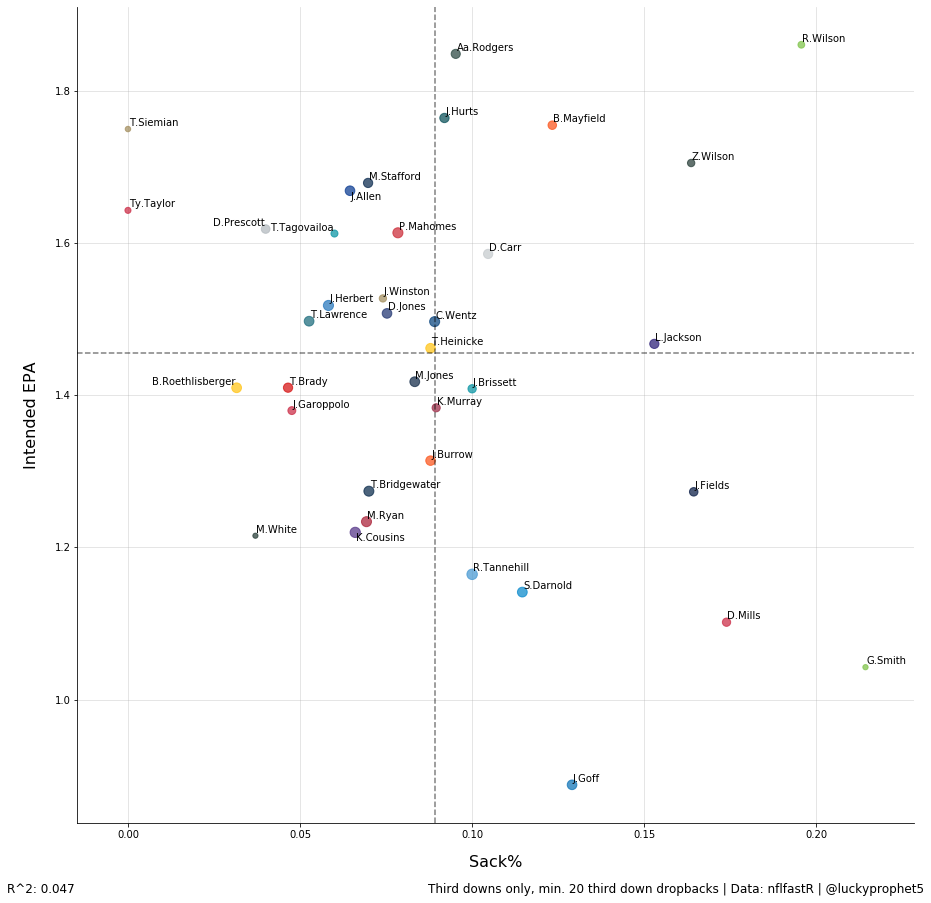

In [8]:
fig, ax = plt.subplots(figsize=(15,15))

#Create vertical and horizontal lines for averages of each metric
ax.axvline(x=passers.sack.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=passers.intended_epa.mean(), linestyle='--', alpha=.5, color='black')

#Create scatter plot
#s stands for size, the dot size is proportional to the QBs number of plays
ax.scatter(passers.sack, passers.intended_epa, 
           s=passers.play_id, 
           alpha=.7, 
           color=passers.color)

#Add text to each dot
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    passers.sack, passers.intended_epa, passers.passer)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Remove top and right boundary lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Add title, labels, and source
ax.set_xlabel('Sack%',fontsize=16,labelpad=15)
ax.set_ylabel('Intended EPA',fontsize=16,labelpad=15)
plt.figtext(.45,.06,'Third downs only, min. 20 third down dropbacks | Data: nflfastR | @luckyprophet5',fontsize=12)
sack_iepa_corr = rsq.loc['sack','intended_epa']
plt.figtext(.06,.06,f'R^2: {sack_iepa_corr:.3f}',fontsize=12)

In [9]:
rsq

,play_id,intended_epa,epa,sack,qb_scramble,delta
play_id,1.000000,0.028273,0.023073,0.007416,0.000348,0.070884
intended_epa,0.028273,1.000000,0.084644,0.047183,0.148000,0.258682
epa,0.023073,0.084644,1.000000,0.443428,0.007765,0.456679
sack,0.007416,0.047183,0.443428,1.000000,0.021450,0.186550
qb_scramble,0.000348,0.148000,0.007765,0.021450,1.000000,0.141146
delta,0.070884,0.258682,0.456679,0.186550,0.141146,1.000000


In [10]:
passers.sort_values('delta',ascending=False).reset_index()[['passer','delta']].style.background_gradient()

,passer,delta
0,K.Murray,-1.034994
1,K.Cousins,-1.175064
2,T.Brady,-1.196169
3,T.Bridgewater,-1.215947
4,M.Ryan,-1.228722
5,J.Garoppolo,-1.230451
6,Ty.Taylor,-1.241226
7,R.Tannehill,-1.260514
8,J.Goff,-1.277359
9,J.Winston,-1.280862


Text(0.6, 0.06, 'Min. 150 dropbacks | Data: nflfastR | @luckyprophet5')

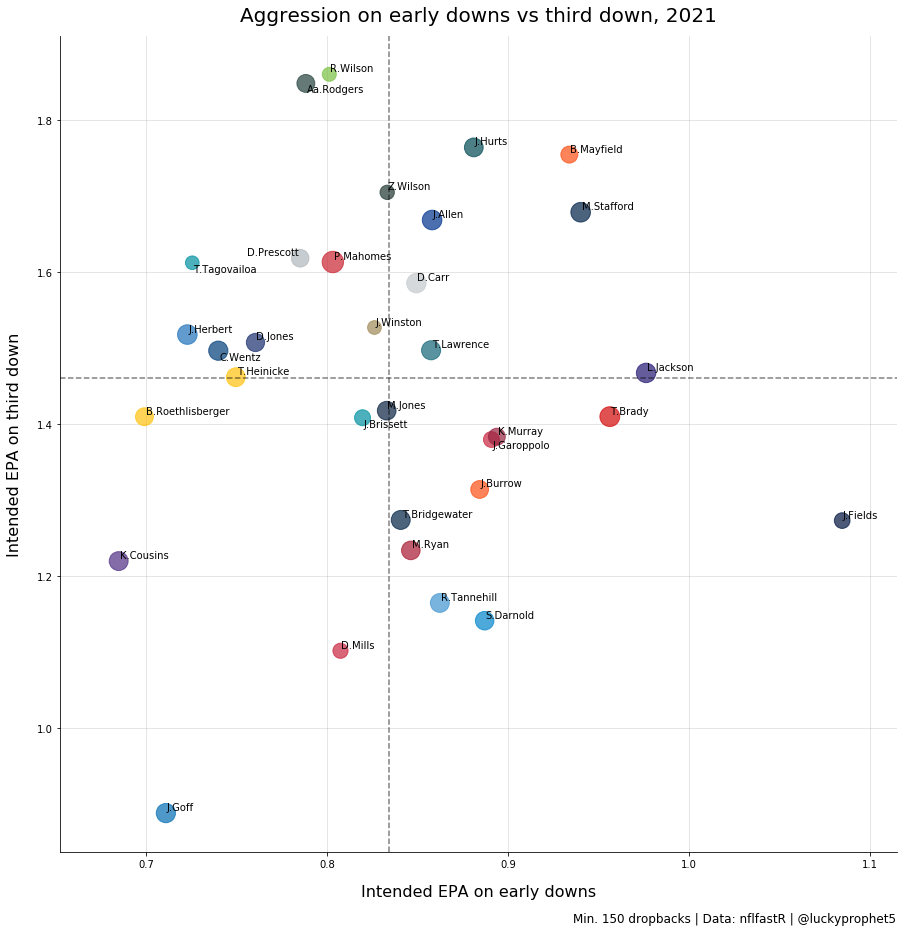

In [15]:
pbp['intended_epa'] = pbp['air_epa'] + pbp['xyac_epa']
qbs = pbp.loc[pbp.qb_dropback==1].groupby('passer').agg({'play_id':'count', 'posteam':'first'}).query('play_id>150')
qbs['early_downs'] = pbp.loc[(pbp.qb_dropback==1) & (pbp.down.isin([1,2]))].groupby('passer').agg({'intended_epa':'mean'})
qbs['third_downs'] = pbp.loc[(pbp.qb_dropback==1) & (pbp.down==3)].groupby('passer').agg({'intended_epa':'mean'})
qbs['color'] = qbs.posteam.map(COLORS)
qbs.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(15,15))

#Create vertical and horizontal lines for averages of each metric
ax.axvline(x=qbs.early_downs.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=qbs.third_downs.mean(), linestyle='--', alpha=.5, color='black')

#Create scatter plot
#s stands for size, the dot size is proportional to the QBs number of plays
ax.scatter(qbs.early_downs, qbs.third_downs, 
           s=qbs.play_id, 
           alpha=.7, 
           color=qbs.color)

#Add text to each dot
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    qbs.early_downs, qbs.third_downs, qbs.passer)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Remove top and right boundary lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Add title, labels, and source
ax.set_title('Aggression on early downs vs third down, 2021',fontsize=20,pad=15)
ax.set_xlabel('Intended EPA on early downs',fontsize=16,labelpad=15)
ax.set_ylabel('Intended EPA on third down',fontsize=16,labelpad=15)
plt.figtext(.6,.06,'Min. 150 dropbacks | Data: nflfastR | @luckyprophet5',fontsize=12)